In [3]:
# load python libraries
import xlrd
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import math as ma
import os


In [4]:
# load dataset (CustomerDemographic worksheet)

df = pd.read_excel(r"C:\Users\Charlie\Desktop\Utiva Bootcamp\Utiva Final Projects\KPMG_Sprocket Project\KPMG_Sprocket Project.xlsx", sheet_name="CustomerDemographic", index_col=0)
df1 = pd.read_excel(r"C:\Users\Charlie\Desktop\Utiva Bootcamp\Utiva Final Projects\KPMG_Sprocket Project\KPMG_Sprocket Project.xlsx",sheet_name="CustomerAddress", index_col=0)
df2 = pd.read_excel(r"C:\Users\Charlie\Desktop\Utiva Bootcamp\Utiva Final Projects\KPMG_Sprocket Project\KPMG_Sprocket Project.xlsx",sheet_name="Transactions", index_col=0)
df3 = pd.read_excel(r"C:\Users\Charlie\Desktop\Utiva Bootcamp\Utiva Final Projects\KPMG_Sprocket Project\KPMG_Sprocket Project.xlsx",sheet_name="NewCustomerList", index_col=0)

C:\Users\Charlie\AppData\Local\Temp\ipykernel_6748\2931839263.py:3: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  df = pd.read_excel(r"C:\Users\Charlie\Desktop\Utiva Bootcamp\Utiva Final Projects\KPMG_Sprocket Project\KPMG_Sprocket Project.xlsx", sheet_name="CustomerDemographic", index_col=0)
C:\Users\Charlie\AppData\Local\Temp\ipykernel_6748\2931839263.py:6: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  df3 = pd.read_excel(r"C:\Users\Charlie\Desktop\Utiva Bootcamp\Utiva Final Projects\KPMG_Sprocket Project\KPMG_Sprocket Project.xlsx",sheet_name="NewCustomerList", index_col=0)


In [5]:
df.head()

first_name  last_name  gender  \
customer_id                                      
1                   Laraine  Medendorp       F   
2                       Eli    Bockman    Male   
3                     Arlin     Dearle    Male   
4                    Talbot        NaN    Male   
5            Sheila-kathryn     Calton  Female   

             past_3_years_bike_related_purchases        DOB  \
customer_id                                                   
1                                             93 1953-10-12   
2                                             81 1980-12-16   
3                                             61 1954-01-20   
4                                             33 1961-10-03   
5                                             56 1977-05-13   

                          job_title job_industry_category     wealth_segment  \
customer_id                                                                    
1               Executive Secretary                Health      Mass Customer   
2            Administrative Officer    Financial Services      Mass Customer   
3                Recruiting Manager              Property      Mass Customer   
4                               NaN                    IT      Mass Customer   
5                     Senior Editor                   NaN  Affluent Customer   

            deceased_indicator  \
customer_id                      
1                            N   
2                            N   
3                            N   
4                            N   
5                            N   

                                                       default owns_car  \
customer_id                                                               
1                                                           "'      Yes   
2                                 <script>alert('hi')</script>      Yes   
3                                          2018-02-01 00:00:00      Yes   
4            () { _; } >_[$($())] { touch /tmp/blns.shellsh...       No   
5                                                          NIL      Yes   

             tenure  
customer_id          
1              11.0  
2              16.0  
3              15.0  
4               7.0  
5               8.0

In [6]:
df.drop(["first_name", "last_name", "default", "job_title","deceased_indicator"], axis=1, inplace=True)

In [7]:
df.head()

gender  past_3_years_bike_related_purchases        DOB  \
customer_id                                                           
1                 F                                   93 1953-10-12   
2              Male                                   81 1980-12-16   
3              Male                                   61 1954-01-20   
4              Male                                   33 1961-10-03   
5            Female                                   56 1977-05-13   

            job_industry_category     wealth_segment owns_car  tenure  
customer_id                                                            
1                          Health      Mass Customer      Yes    11.0  
2              Financial Services      Mass Customer      Yes    16.0  
3                        Property      Mass Customer      Yes    15.0  
4                              IT      Mass Customer       No     7.0  
5                             NaN  Affluent Customer      Yes     8.0

In [8]:
# replace initials with gender names
df.replace(to_replace ="F", value="Female", inplace=True)
df.replace(to_replace ="Femal", value="Female", inplace=True)
df.replace(to_replace ="M", value="Male", inplace=True)
df.replace(to_replace ="U", value="other", inplace=True)

In [9]:
df.head()

gender  past_3_years_bike_related_purchases        DOB  \
customer_id                                                           
1            Female                                   93 1953-10-12   
2              Male                                   81 1980-12-16   
3              Male                                   61 1954-01-20   
4              Male                                   33 1961-10-03   
5            Female                                   56 1977-05-13   

            job_industry_category     wealth_segment owns_car  tenure  
customer_id                                                            
1                          Health      Mass Customer      Yes    11.0  
2              Financial Services      Mass Customer      Yes    16.0  
3                        Property      Mass Customer      Yes    15.0  
4                              IT      Mass Customer       No     7.0  
5                             NaN  Affluent Customer      Yes     8.0

In [10]:
# replace those that owns car with 1 and those that doesn't own car with 0
df.replace(to_replace ="Yes", value="1", inplace=True)
df.replace(to_replace ="No", value="0", inplace=True)

In [11]:
df.head()

gender  past_3_years_bike_related_purchases        DOB  \
customer_id                                                           
1            Female                                   93 1953-10-12   
2              Male                                   81 1980-12-16   
3              Male                                   61 1954-01-20   
4              Male                                   33 1961-10-03   
5            Female                                   56 1977-05-13   

            job_industry_category     wealth_segment owns_car  tenure  
customer_id                                                            
1                          Health      Mass Customer        1    11.0  
2              Financial Services      Mass Customer        1    16.0  
3                        Property      Mass Customer        1    15.0  
4                              IT      Mass Customer        0     7.0  
5                             NaN  Affluent Customer        1     8.0

In [12]:
# Calculates the time difference between the current date and the values in the 'DOB' column. This division converts the time difference into a float value representing the age in years.
df["age"] = (dt.datetime.now() - df["DOB"]) / np.timedelta64(1, "Y")

In [13]:
df.head()

gender  past_3_years_bike_related_purchases        DOB  \
customer_id                                                           
1            Female                                   93 1953-10-12   
2              Male                                   81 1980-12-16   
3              Male                                   61 1954-01-20   
4              Male                                   33 1961-10-03   
5            Female                                   56 1977-05-13   

            job_industry_category     wealth_segment owns_car  tenure  \
customer_id                                                             
1                          Health      Mass Customer        1    11.0   
2              Financial Services      Mass Customer        1    16.0   
3                        Property      Mass Customer        1    15.0   
4                              IT      Mass Customer        0     7.0   
5                             NaN  Affluent Customer        1     8.0   

                   age  
customer_id             
1            69.816528  
2            42.637325  
3            69.542737  
4            61.841005  
5            46.232197

In [14]:
df["age_class"] = ((round(df["age"] / 10)) * 10)

In [15]:
df.head()

gender  past_3_years_bike_related_purchases        DOB  \
customer_id                                                           
1            Female                                   93 1953-10-12   
2              Male                                   81 1980-12-16   
3              Male                                   61 1954-01-20   
4              Male                                   33 1961-10-03   
5            Female                                   56 1977-05-13   

            job_industry_category     wealth_segment owns_car  tenure  \
customer_id                                                             
1                          Health      Mass Customer        1    11.0   
2              Financial Services      Mass Customer        1    16.0   
3                        Property      Mass Customer        1    15.0   
4                              IT      Mass Customer        0     7.0   
5                             NaN  Affluent Customer        1     8.0   

                   age  age_class  
customer_id                        
1            69.816528       70.0  
2            42.637325       40.0  
3            69.542737       70.0  
4            61.841005       60.0  
5            46.232197       50.0

In [16]:
# load dataset (CustomerAddress worksheet)

df1 = pd.read_excel(r"C:\Users\Charlie\Desktop\Utiva Bootcamp\Utiva Final Projects\KPMG_Sprocket Project\KPMG_Sprocket Project.xlsx",sheet_name="CustomerAddress", index_col=0)

In [17]:
df1.head()

address  postcode            state    country  \
customer_id                                                              
1             060 Morning Avenue      2016  New South Wales  Australia   
2            6 Meadow Vale Court      2153  New South Wales  Australia   
4             0 Holy Cross Court      4211              QLD  Australia   
5            17979 Del Mar Point      2448  New South Wales  Australia   
6               9 Oakridge Court      3216              VIC  Australia   

             property_valuation  
customer_id                      
1                            10  
2                            10  
4                             9  
5                             4  
6                             9

In [18]:
df1["state"].replace("New South Wales", "NSW", inplace=True)
df1["state"].replace("Victoria", "VIC", inplace=True)
df1 = df1.dropna()
df1.head()

address  postcode state    country  \
customer_id                                                   
1             060 Morning Avenue      2016   NSW  Australia   
2            6 Meadow Vale Court      2153   NSW  Australia   
4             0 Holy Cross Court      4211   QLD  Australia   
5            17979 Del Mar Point      2448   NSW  Australia   
6               9 Oakridge Court      3216   VIC  Australia   

             property_valuation  
customer_id                      
1                            10  
2                            10  
4                             9  
5                             4  
6                             9

In [19]:
df1_merge = pd.merge(df, df1, left_index=True, right_index=True)  #merging df & df1 using matching index columns
df1_merge= df1_merge.dropna()  #drop all rows/columns that has missing or NaN values
df1_merge.head()

gender  past_3_years_bike_related_purchases        DOB  \
customer_id                                                           
1            Female                                   93 1953-10-12   
2              Male                                   81 1980-12-16   
4              Male                                   33 1961-10-03   
6              Male                                   35 1966-09-16   
7            Female                                    6 1976-02-23   

            job_industry_category     wealth_segment owns_car  tenure  \
customer_id                                                             
1                          Health      Mass Customer        1    11.0   
2              Financial Services      Mass Customer        1    16.0   
4                              IT      Mass Customer        0     7.0   
6                          Retail     High Net Worth        1    13.0   
7              Financial Services  Affluent Customer        1    11.0   

                   age  age_class              address  postcode state  \
customer_id                                                              
1            69.816528       70.0   060 Morning Avenue      2016   NSW   
2            42.637325       40.0  6 Meadow Vale Court      2153   NSW   
4            61.841005       60.0   0 Holy Cross Court      4211   QLD   
6            56.888131       60.0     9 Oakridge Court      3216   VIC   
7            47.450566       50.0     4 Delaware Trail      2210   NSW   

               country  property_valuation  
customer_id                                 
1            Australia                  10  
2            Australia                  10  
4            Australia                   9  
6            Australia                   9  
7            Australia                   9

In [20]:
# load dataset (Transactions worksheet)

df2 = pd.read_excel(r"C:\Users\Charlie\Desktop\Utiva Bootcamp\Utiva Final Projects\KPMG_Sprocket Project\KPMG_Sprocket Project.xlsx",sheet_name="Transactions", index_col=0)
df2.head()

product_id  customer_id transaction_date  online_order  \
transaction_id                                                           
1                        2         2950       2017-02-25           0.0   
2                        3         3120       2017-05-21           1.0   
3                       37          402       2017-10-16           0.0   
4                       88         3135       2017-08-31           0.0   
5                       78          787       2017-10-01           1.0   

               order_status           brand product_line product_class  \
transaction_id                                                           
1                  Approved           Solex     Standard        medium   
2                  Approved   Trek Bicycles     Standard        medium   
3                  Approved      OHM Cycles     Standard           low   
4                  Approved  Norco Bicycles     Standard        medium   
5                  Approved  Giant Bicycles     Standard        medium   

               product_size  list_price  standard_cost  \
transaction_id                                           
1                    medium       71.49          53.62   
2                     large     2091.47         388.92   
3                    medium     1793.43         248.82   
4                    medium     1198.46         381.10   
5                     large     1765.30         709.48   

                product_first_sold_date  
transaction_id                           
1                               41245.0  
2                               41701.0  
3                               36361.0  
4                               36145.0  
5                               42226.0

In [21]:
df2 = df2.sort_values("customer_id")  #sort values from customer_id column in ascending order

In [22]:
df2.head()

product_id  customer_id transaction_date  online_order  \
transaction_id                                                           
14486                   23            1       2017-03-27           0.0   
18970                   11            1       2017-03-29           1.0   
16423                    9            1       2017-12-09           1.0   
5157                    47            1       2017-05-11           1.0   
13424                    2            1       2017-02-21           0.0   

               order_status           brand product_line product_class  \
transaction_id                                                           
14486              Approved  Norco Bicycles     Mountain           low   
18970              Approved  Giant Bicycles     Standard          high   
16423              Approved      OHM Cycles         Road        medium   
5157               Approved   Trek Bicycles         Road           low   
13424              Approved           Solex     Standard        medium   

               product_size  list_price  standard_cost  \
transaction_id                                           
14486                 small      688.63         612.88   
18970                medium     1274.93         764.96   
16423                medium      742.54         667.40   
5157                  small     1720.70        1531.42   
13424                medium       71.49          53.62   

                product_first_sold_date  
transaction_id                           
14486                           33455.0  
18970                           35378.0  
16423                           37838.0  
5157                            37823.0  
13424                           38573.0

In [23]:
df2.isna().sum()  # check number of missing values

product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [24]:
df2.shape

(20000, 12)

In [25]:
# convert a numerical column (product_first_sold_date) to datetime format
df2["product_first_sold_date"] = pd.to_timedelta(df2["product_first_sold_date"], unit="d") + pd.Timestamp("1900-01-01")


In [26]:
df2.head()

product_id  customer_id transaction_date  online_order  \
transaction_id                                                           
14486                   23            1       2017-03-27           0.0   
18970                   11            1       2017-03-29           1.0   
16423                    9            1       2017-12-09           1.0   
5157                    47            1       2017-05-11           1.0   
13424                    2            1       2017-02-21           0.0   

               order_status           brand product_line product_class  \
transaction_id                                                           
14486              Approved  Norco Bicycles     Mountain           low   
18970              Approved  Giant Bicycles     Standard          high   
16423              Approved      OHM Cycles         Road        medium   
5157               Approved   Trek Bicycles         Road           low   
13424              Approved           Solex     Standard        medium   

               product_size  list_price  standard_cost product_first_sold_date  
transaction_id                                                                  
14486                 small      688.63         612.88              1991-08-07  
18970                medium     1274.93         764.96              1996-11-11  
16423                medium      742.54         667.40              2003-08-07  
5157                  small     1720.70        1531.42              2003-07-23  
13424                medium       71.49          53.62              2005-08-11

In [27]:
df2_new = df2.dropna()


In [28]:
df2_new.shape

(19445, 12)

In [29]:
df2_new.isna().sum()

product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

## Exploratory Data Analysis

## NewCustomerList

In [30]:
df3.head()

last_name  gender  past_3_years_bike_related_purchases        DOB  \
first_name                                                                      
Chickie       Brister    Male                                   86 1957-07-12   
Morly          Genery    Male                                   69 1970-03-22   
Ardelis     Forrester  Female                                   10 1974-08-28   
Lucine          Stutt  Female                                   64 1979-01-28   
Melinda        Hadlee  Female                                   34 1965-09-21   

                             job_title job_industry_category  \
first_name                                                     
Chickie                General Manager         Manufacturing   
Morly              Structural Engineer              Property   
Ardelis         Senior Cost Accountant    Financial Services   
Lucine      Account Representative III         Manufacturing   
Melinda              Financial Analyst    Financial Services   

               wealth_segment deceased_indicator owns_car  tenure  ... state  \
first_name                                                         ...         
Chickie         Mass Customer                  N      Yes      14  ...   QLD   
Morly           Mass Customer                  N       No      16  ...   NSW   
Ardelis     Affluent Customer                  N       No      10  ...   VIC   
Lucine      Affluent Customer                  N      Yes       5  ...   QLD   
Melinda     Affluent Customer                  N       No      19  ...   NSW   

              country property_valuation Unnamed: 16  Unnamed: 17  \
first_name                                                          
Chickie     Australia                  6        0.67       0.8375   
Morly       Australia                 11        0.62       0.6200   
Ardelis     Australia                  5        0.80       0.8000   
Lucine      Australia                  1        1.02       1.2750   
Melinda     Australia                  9        0.82       0.8200   

            Unnamed: 18  Unnamed: 19  Unnamed: 20  Rank     Value  
first_name                                                         
Chickie        1.046875     0.889844            1     1  1.718750  
Morly          0.775000     0.658750            1     1  1.718750  
Ardelis        0.800000     0.800000            1     1  1.718750  
Lucine         1.275000     1.275000            4     4  1.703125  
Melinda        1.025000     1.025000            4     4  1.703125  

[5 rows x 22 columns]

In [31]:
df3.drop(["Unnamed: 16","Unnamed: 17","Unnamed: 18","Unnamed: 19","Unnamed: 20"], axis=1, inplace=True)

In [32]:
df3.replace(to_replace ="U", value="other", inplace=True)

In [33]:
df3.head()

last_name  gender  past_3_years_bike_related_purchases        DOB  \
first_name                                                                      
Chickie       Brister    Male                                   86 1957-07-12   
Morly          Genery    Male                                   69 1970-03-22   
Ardelis     Forrester  Female                                   10 1974-08-28   
Lucine          Stutt  Female                                   64 1979-01-28   
Melinda        Hadlee  Female                                   34 1965-09-21   

                             job_title job_industry_category  \
first_name                                                     
Chickie                General Manager         Manufacturing   
Morly              Structural Engineer              Property   
Ardelis         Senior Cost Accountant    Financial Services   
Lucine      Account Representative III         Manufacturing   
Melinda              Financial Analyst    Financial Services   

               wealth_segment deceased_indicator owns_car  tenure  \
first_name                                                          
Chickie         Mass Customer                  N      Yes      14   
Morly           Mass Customer                  N       No      16   
Ardelis     Affluent Customer                  N       No      10   
Lucine      Affluent Customer                  N      Yes       5   
Melinda     Affluent Customer                  N       No      19   

                        address  postcode state    country  \
first_name                                                   
Chickie        45 Shopko Center      4500   QLD  Australia   
Morly         14 Mccormick Park      2113   NSW  Australia   
Ardelis     5 Colorado Crossing      3505   VIC  Australia   
Lucine       207 Annamark Plaza      4814   QLD  Australia   
Melinda       115 Montana Place      2093   NSW  Australia   

            property_valuation  Rank     Value  
first_name                                      
Chickie                      6     1  1.718750  
Morly                       11     1  1.718750  
Ardelis                      5     1  1.718750  
Lucine                       1     4  1.703125  
Melinda                      9     4  1.703125

<AxesSubplot:xlabel='count', ylabel='job_industry_category'>

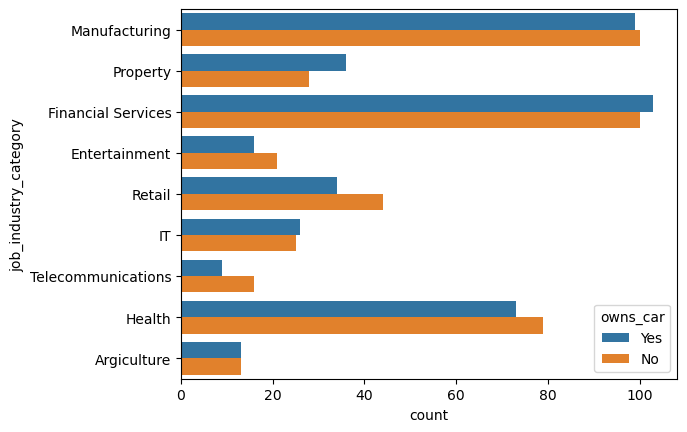

In [34]:
sns.countplot(y="job_industry_category",hue="owns_car", data=df3)

### From the above, it can be inferred that the new customers from the Financial Services category that owns car are more than others while those that don't own cars are same for both Financial Services and Manufacturing job categories which are more than other categories.

### As a result, Sprocket Central Pty Ltd might have to focus on other industry categories potential customers except Manufacturing, Financial Services and Health categories for the sale of their bikes - Marketing Strategy

<AxesSubplot:xlabel='Value', ylabel='job_industry_category'>

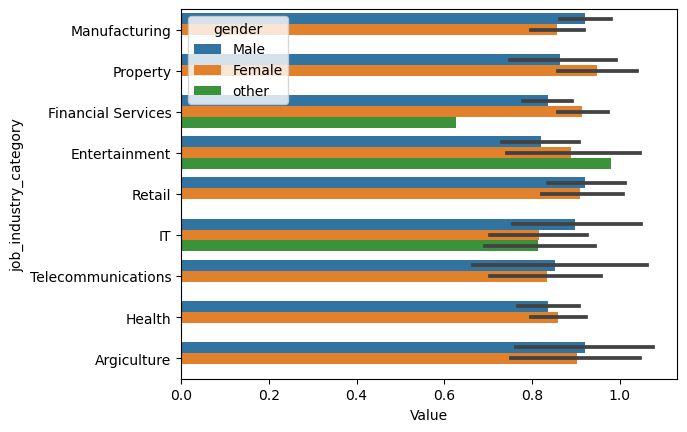

In [35]:
sns.barplot(y="job_industry_category", x="Value", hue="gender", data=df3)

### From the above plot, both the female and male genders have very high new customer values across all industry categories. 
### This makes them excellent prospective targets for the company sales business - Marketing Strategy

<AxesSubplot:xlabel='wealth_segment', ylabel='Value'>

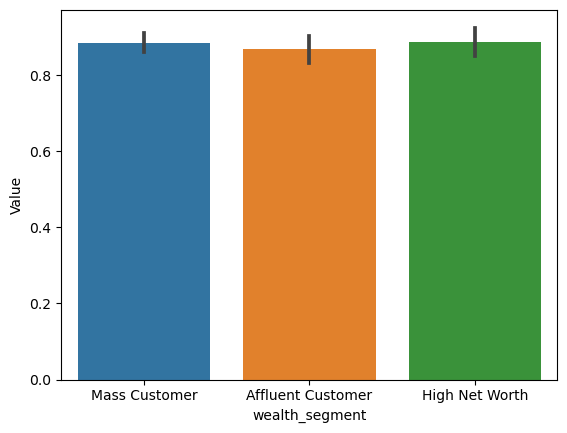

In [36]:
sns.barplot(x="wealth_segment",y="Value", data=df3)

### From the above, it can be seen that the "High Net Worth" segment has slightly the highest customer value

<AxesSubplot:xlabel='wealth_segment', ylabel='past_3_years_bike_related_purchases'>

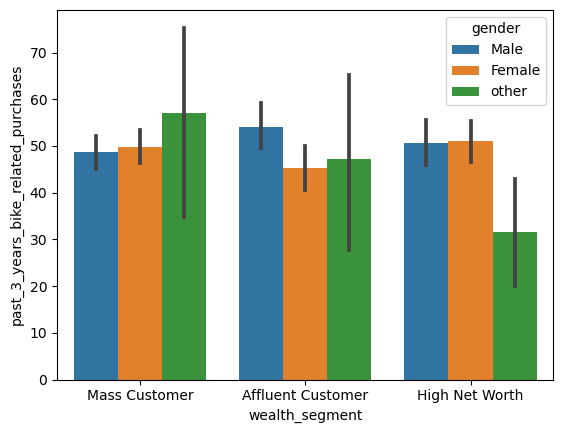

In [37]:
sns.barplot(x="wealth_segment", y="past_3_years_bike_related_purchases", hue="gender", data=df3)

### From the above plot, both all genders across all wealth segments have made almost same bike purchases for the past 3 years unlike for the High Net Worth where the "other" gender made the least bike purchases.

## Transactions

In [38]:
df2.head()

product_id  customer_id transaction_date  online_order  \
transaction_id                                                           
14486                   23            1       2017-03-27           0.0   
18970                   11            1       2017-03-29           1.0   
16423                    9            1       2017-12-09           1.0   
5157                    47            1       2017-05-11           1.0   
13424                    2            1       2017-02-21           0.0   

               order_status           brand product_line product_class  \
transaction_id                                                           
14486              Approved  Norco Bicycles     Mountain           low   
18970              Approved  Giant Bicycles     Standard          high   
16423              Approved      OHM Cycles         Road        medium   
5157               Approved   Trek Bicycles         Road           low   
13424              Approved           Solex     Standard        medium   

               product_size  list_price  standard_cost product_first_sold_date  
transaction_id                                                                  
14486                 small      688.63         612.88              1991-08-07  
18970                medium     1274.93         764.96              1996-11-11  
16423                medium      742.54         667.40              2003-08-07  
5157                  small     1720.70        1531.42              2003-07-23  
13424                medium       71.49          53.62              2005-08-11

<AxesSubplot:xlabel='online_order', ylabel='count'>

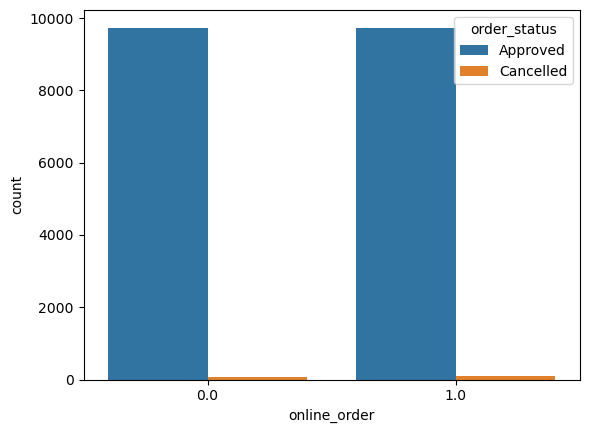

In [39]:
sns.countplot(x="online_order", hue="order_status", data=df2)

### From the above plot, both approved and cancelled orders show the same trend with respect to online_orders.

<AxesSubplot:xlabel='list_price', ylabel='brand'>

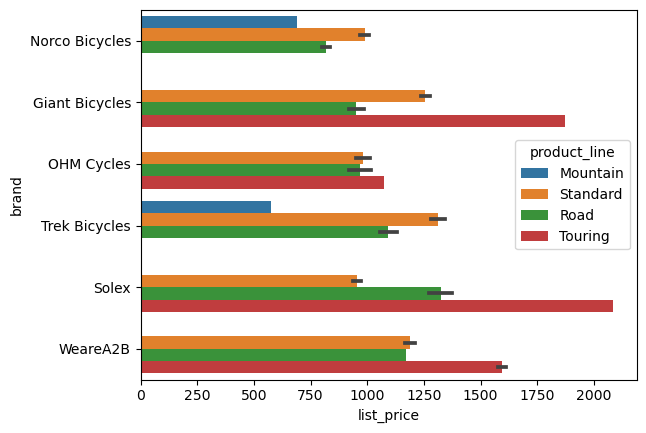

In [40]:
sns.barplot(y="brand", x="list_price", hue="product_line", data=df2)

### From the above plot, it can be inferred that Solex bikes used for Road and Touring are most priced while the Standard bikes costs almost same across different brands.  Also, most of the company's bikes used for Mountains  are least priced(least profitable) across all brands. 

## CustomerDemographic

In [41]:
df.head()

gender  past_3_years_bike_related_purchases        DOB  \
customer_id                                                           
1            Female                                   93 1953-10-12   
2              Male                                   81 1980-12-16   
3              Male                                   61 1954-01-20   
4              Male                                   33 1961-10-03   
5            Female                                   56 1977-05-13   

            job_industry_category     wealth_segment owns_car  tenure  \
customer_id                                                             
1                          Health      Mass Customer        1    11.0   
2              Financial Services      Mass Customer        1    16.0   
3                        Property      Mass Customer        1    15.0   
4                              IT      Mass Customer        0     7.0   
5                             NaN  Affluent Customer        1     8.0   

                   age  age_class  
customer_id                        
1            69.816528       70.0  
2            42.637325       40.0  
3            69.542737       70.0  
4            61.841005       60.0  
5            46.232197       50.0

<AxesSubplot:xlabel='wealth_segment', ylabel='age_class'>

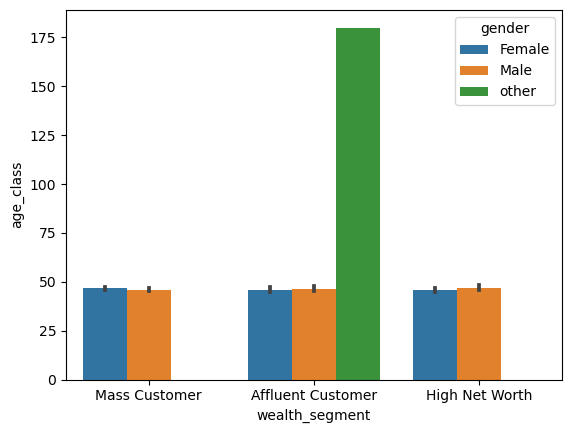

In [42]:
sns.barplot(x="wealth_segment", y="age_class", hue="gender", data=df)

### From the above plot, the Affluent Customers are basically both male and female genders within the same age ranges. The "other" gender might be basically elders/old affluent customers.

<AxesSubplot:xlabel='wealth_segment', ylabel='past_3_years_bike_related_purchases'>

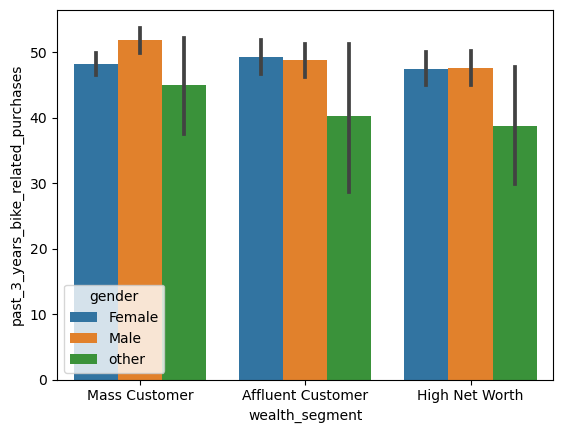

In [43]:
sns.barplot(x="wealth_segment", y="past_3_years_bike_related_purchases", hue="gender", data=df)

### From the above plot, both male and female genders across all wealth segments have made almost average same bike purchases for the past 3 years than the "other" gender.

### Finally, the Product dimensional dataset as an additional dataset, is useful to obtain greater insights into customer preferences and propensity for product purchases.